<a href="https://colab.research.google.com/github/Almjes/Almejes/blob/main/dados_da_CVM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baixando dados da CVM
http://dados.cvm.gov.br/dataset/cia_aberta-doc-itr

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ff922b5ee646d766eb5a580b60181a16f4a064b8cbb0543d7c52131f93f18d4b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
# importando bibliotecas
import pandas as pd 
import wget
from zipfile import ZipFile

## Acessando a base de dados e criando arquivos históricos

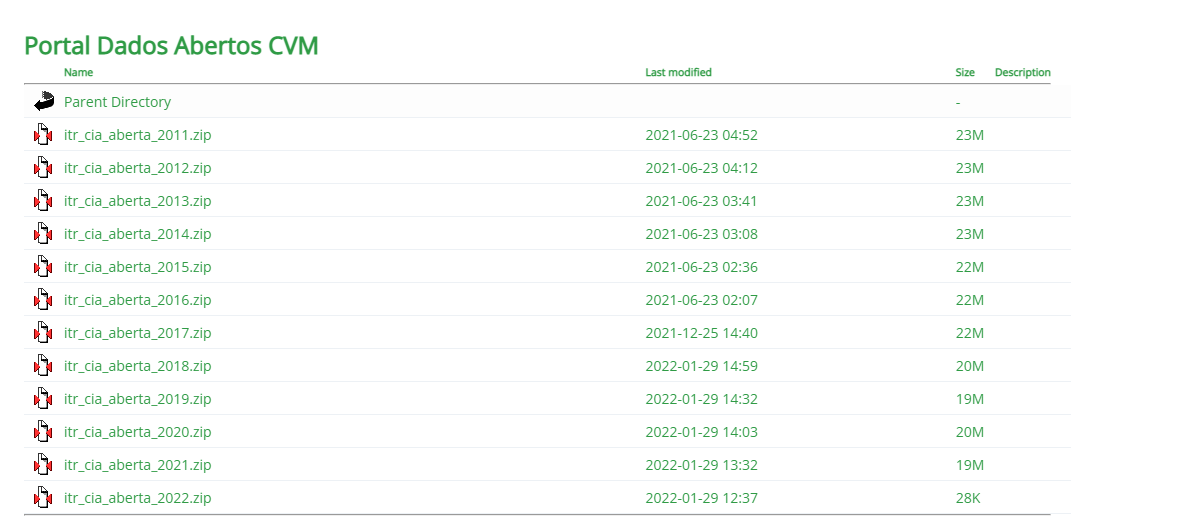

In [ ]:
url_base = 'http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/ITR/DADOS/'

In [ ]:
# criando uma lista com o nome de todos os arquivos
arquivos_zips =[]
for ano in range(2011,2022):
  arquivos_zips.append(f'itr_cia_aberta_{ano}.zip')
arquivos_zips

['itr_cia_aberta_2011.zip',
 'itr_cia_aberta_2012.zip',
 'itr_cia_aberta_2013.zip',
 'itr_cia_aberta_2014.zip',
 'itr_cia_aberta_2015.zip',
 'itr_cia_aberta_2016.zip',
 'itr_cia_aberta_2017.zip',
 'itr_cia_aberta_2018.zip',
 'itr_cia_aberta_2019.zip',
 'itr_cia_aberta_2020.zip',
 'itr_cia_aberta_2021.zip']

In [ ]:
for arq in arquivos_zips:
  wget.download(url_base+arq)


In [ ]:
# extrair os arquivos zip
for arq in arquivos_zips:
  ZipFile(arq,'r').extractall('CVM')  # criando uma pasta chamada CMV


In [ ]:
# criando uma base de dados historico
nomes = ['BPA_con','BPA_ind','BPP_con','BPP_ind','DFC_MD_con','DFC_MD_ind','DFC_MI_con','DFC_MI_ind','DMPL_con','DMPL_ind','DRA_con','DRA_ind','DRE_con','DRE_ind','DVA_con','DVA_ind']

for nome in nomes:
  arquivo = pd.DataFrame()
  try:
    for ano in range(2011,2022):
      arquivo= pd.concat([arquivo, pd.read_csv(f'CVM/itr_cia_aberta_{nome}_{ano}.csv',sep=';',decimal=',', encoding ='ISO-8859-1')])

  except FileNotFoundError:
    continue
     
    

  arquivo.to_csv(f'DADOS/itr_cia_aberta_{nome}_2011-2021', index = False)  


In [ ]:
pd.read_csv('/content/CVM/itr_cia_aberta_BPA_con_2011.csv',sep=';',decimal=',', encoding ='ISO-8859-1')

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2010-12-31,1,Ativo Total,146901002.0000000000,S
1,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2011-03-31,1,Ativo Total,149751700.0000000000,S
2,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2010-12-31,1.01,Ativo Circulante,32805947.0000000000,S
3,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2011-03-31,1.01,Ativo Circulante,34736318.0000000000,S
4,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2010-12-31,1.01.01,Caixa e Equivalentes de Caixa,11278387.0000000000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135865,97.837.181/0001-47,2011-09-30,1,DURATEX S.A.,21091,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2011-09-30,1.02.04.02.01,Goodwill na associação da Satipel em 2009,187573.0000000000,N
135866,97.837.181/0001-47,2011-09-30,1,DURATEX S.A.,21091,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2010-12-31,1.02.04.02.02,Goodwill na aquisição Cerâmica Monte Carlo em ...,22154.0000000000,N
135867,97.837.181/0001-47,2011-09-30,1,DURATEX S.A.,21091,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2011-09-30,1.02.04.02.02,Goodwill na aquisição Cerâmica Monte Carlo em ...,22154.0000000000,N
135868,97.837.181/0001-47,2011-09-30,1,DURATEX S.A.,21091,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2010-12-31,1.02.04.02.03,Goodwill na aquisição da Deca Nordeste em 2011,0.0000000000,N


In [ ]:
dre = pd.read_csv('/content/DADOS/itr_cia_aberta_DRE_con_2011-2021')

In [ ]:
dre

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2010-01-01,2010-03-31,3.01,Receita de Venda de Bens e/ou Serviços,6.159172e+06,S
1,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-03-31,3.01,Receita de Venda de Bens e/ou Serviços,8.551982e+06,S
2,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2010-01-01,2010-03-31,3.02,Custo dos Bens e/ou Serviços Vendidos,-9.600600e+05,S
3,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-03-31,3.02,Custo dos Bens e/ou Serviços Vendidos,-1.127021e+06,S
4,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2010-01-01,2010-03-31,3.02.01,Encargos Setoriais,-3.406600e+05,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342558,97.837.181/0001-47,2021-09-30,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2021-07-01,2021-09-30,3.99.02,Lucro Diluído por Ação,0.000000e+00,N
1342559,97.837.181/0001-47,2021-09-30,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2020-01-01,2020-09-30,3.99.02.01,ON,2.187000e-01,N
1342560,97.837.181/0001-47,2021-09-30,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2020-07-01,2020-09-30,3.99.02.01,ON,1.780000e-01,N
1342561,97.837.181/0001-47,2021-09-30,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2021-01-01,2021-09-30,3.99.02.01,ON,1.654400e+00,N


In [ ]:
dre.columns

Index(['CNPJ_CIA', 'DT_REFER', 'VERSAO', 'DENOM_CIA', 'CD_CVM', 'GRUPO_DFP',
       'MOEDA', 'ESCALA_MOEDA', 'ORDEM_EXERC', 'DT_INI_EXERC', 'DT_FIM_EXERC',
       'CD_CONTA', 'DS_CONTA', 'VL_CONTA', 'ST_CONTA_FIXA'],
      dtype='object')